# Heart case

## Data import

In [140]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('heart2.csv')


In [141]:
df.head(3)

,area,age,frac_short,atrial_dim,wall_motion_index,hemat,per_eff,family,target
0,2,50,0.235,41.193446,1.65,0.594,1,0,0
1,3,49,0.203,33.906600,1.41,0.406,0,0,0
2,1,51,0.208,34.581016,1.45,0.424,0,0,0


In [142]:
df.isnull().sum()

area                 0
age                  0
frac_short           0
atrial_dim           0
wall_motion_index    0
hemat                0
per_eff              0
family               0
target               0
dtype: int64

In [143]:
df.tail()

,area,age,frac_short,atrial_dim,wall_motion_index,hemat,per_eff,family,target
911,2,68,0.150,43.0,1.37,0.563,0,0,1
912,1,60,0.159,34.2,1.18,0.393,0,0,1
913,4,67,0.171,39.6,1.98,0.497,0,1,1
914,2,59,0.163,38.9,1.23,0.483,1,0,1
915,2,52,0.171,36.2,1.30,0.430,1,0,1


## Split categorical/continuos variables

In [144]:
df_categorical=df[['area','per_eff','family']]

In [145]:
df_numerical=df[['age', 'frac_short', 'atrial_dim', 'wall_motion_index', 'hemat','target']]
df_numerical.head()

,age,frac_short,atrial_dim,wall_motion_index,hemat,target
0,50,0.235,41.193446,1.65,0.594,0
1,49,0.203,33.906600,1.41,0.406,0
2,51,0.208,34.581016,1.45,0.424,0
3,59,0.248,35.725504,1.76,0.453,0
4,53,0.253,35.716658,1.80,0.453,0


## Categorial Data

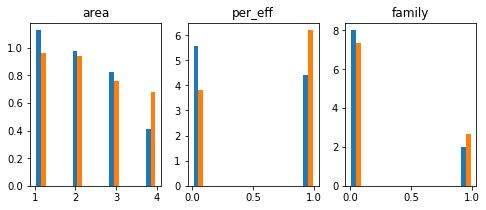

In [146]:
df_0=df_categorical[df['target']==0] # records wih target==1
df_1=df_categorical[df['target']==1] # records wih target==0


fig, axes = plt.subplots(1, 3,figsize=[8,3])
axes = axes.flatten()
i=0
for x in df_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()


In [147]:
dummies = pd.get_dummies(df_categorical.astype(str),drop_first=True) 

dummies.tail()

,area_2,area_3,area_4,per_eff_1,family_1
911,1,0,0,0,0
912,0,0,0,0,0
913,0,0,1,0,1
914,1,0,0,1,0
915,1,0,0,1,0


## Numerical data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3f8d00b90>,
      dtype=object)

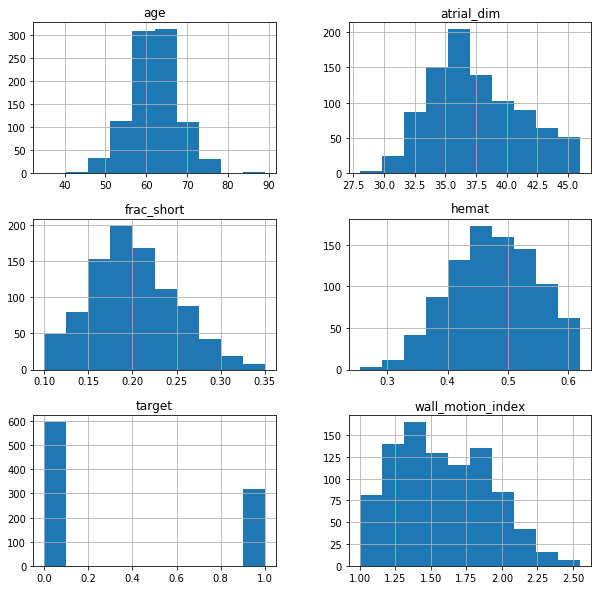

In [148]:
df_numerical.hist(figsize=(10,10))

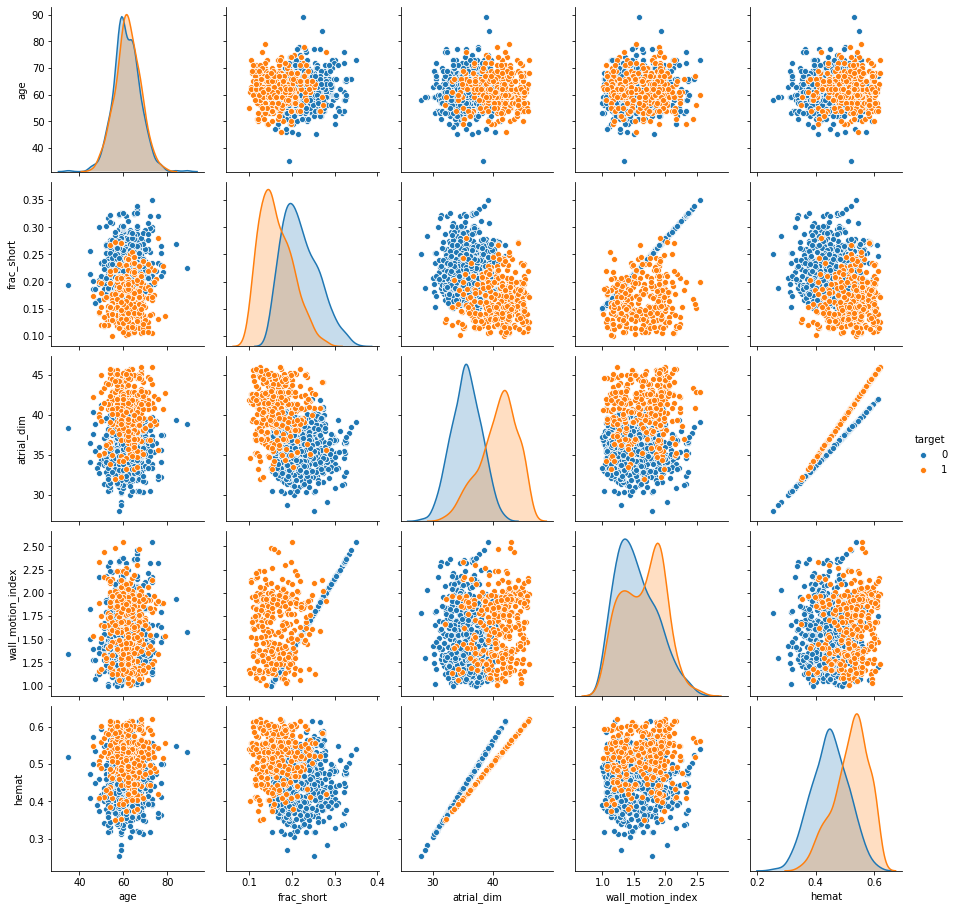

In [149]:
sns.pairplot(df_numerical, hue='target')

## Standarize

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

scaled_df.head()

,age,frac_short,atrial_dim,wall_motion_index,hemat,target
0,-2.002002,0.712390,1.020032,0.210831,1.700784,-0.732743
1,-2.172038,0.051602,-0.970195,-0.519881,-0.990638,-0.732743
2,-1.831967,0.154850,-0.785994,-0.398095,-0.732949,-0.732743
3,-0.471682,0.980835,-0.473405,0.545740,-0.317783,-0.732743
4,-1.491896,1.084084,-0.475821,0.667525,-0.317783,-0.732743


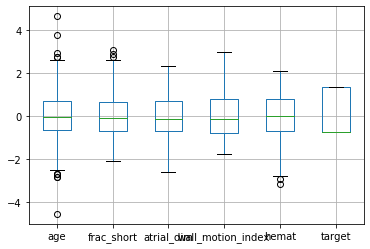

In [104]:
scaled_df.boxplot()

In [105]:
scaled_df.tail()

,age,frac_short,atrial_dim,wall_motion_index,hemat,target
911,1.058639,-1.042829,1.513448,-0.641666,1.256986,1.364734
912,-0.301646,-0.856983,-0.890059,-1.220146,-1.176747,1.364734
913,0.888603,-0.609187,0.584820,1.215559,0.312125,1.364734
914,-0.471682,-0.774384,0.393632,-1.067914,0.111700,1.364734
915,-1.661931,-0.609187,-0.343808,-0.854790,-0.647052,1.364734


In [151]:
#X_numerical=scaled_df
X_numerical=df_numerical

In [152]:
dummies.tail(3)

,area_2,area_3,area_4,per_eff_1,family_1
913,0,0,1,0,1
914,1,0,0,1,0
915,1,0,0,1,0


In [153]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

(916, 5)
(916, 6)


,area_2,area_3,area_4,per_eff_1,family_1
911,1,0,0,0,0
912,0,0,0,0,0
913,0,0,1,0,1
914,1,0,0,1,0
915,1,0,0,1,0


In [154]:
X=pd.concat([dummies,X_numerical.iloc[:,:-1]], axis = 1)
X.tail()

,area_2,area_3,area_4,per_eff_1,family_1,age,frac_short,atrial_dim,wall_motion_index,hemat
911,1,0,0,0,0,68,0.150,43.0,1.37,0.563
912,0,0,0,0,0,60,0.159,34.2,1.18,0.393
913,0,0,1,0,1,67,0.171,39.6,1.98,0.497
914,1,0,0,1,0,59,0.163,38.9,1.23,0.483
915,1,0,0,1,0,52,0.171,36.2,1.30,0.430


### Separate Train/Test sets


In [155]:
y=df['target']

In [156]:
y.shape

(916,)

In [157]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(641, 10) (275, 10)


## Models

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score

In [159]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,30,5)}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



In [160]:
hyperp_search(classifier,parameters)

f1_train: 0.765327 using {'n_neighbors': 21}
f1_test:  0.7976878612716763
[[171   8]
 [ 27  69]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       179
           1       0.90      0.72      0.80        96

    accuracy                           0.87       275
   macro avg       0.88      0.84      0.85       275
weighted avg       0.87      0.87      0.87       275



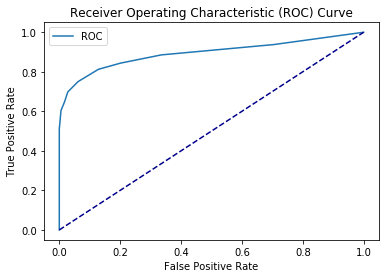

AUC: 0.89


In [161]:
model_knn = KNeighborsClassifier(n_neighbors=10)

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)

In [162]:
#Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,10],
              'min_samples_split': [20],
              'min_samples_leaf': [10]}

hyperp_search(classifier,parameters)


f1_train: 0.885021 using {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20}
f1_test:  0.9518716577540107
[[177   2]
 [  7  89]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       179
           1       0.98      0.93      0.95        96

    accuracy                           0.97       275
   macro avg       0.97      0.96      0.96       275
weighted avg       0.97      0.97      0.97       275



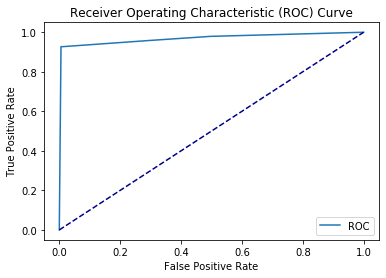

AUC: 0.97


In [163]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)

fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)


## Plotting the tree 

In [165]:
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=2)
print(r)


|--- atrial_dim <= 40.50
|   |--- frac_short <= 0.15
|   |   |--- class: 1
|   |--- frac_short >  0.15
|   |   |--- atrial_dim <= 38.05
|   |   |   |--- truncated branch of depth 3
|   |   |--- atrial_dim >  38.05
|   |   |   |--- truncated branch of depth 2
|--- atrial_dim >  40.50
|   |--- hemat <= 0.58
|   |   |--- class: 1
|   |--- hemat >  0.58
|   |   |--- atrial_dim <= 44.05
|   |   |   |--- class: 0
|   |   |--- atrial_dim >  44.05
|   |   |   |--- class: 1



In [166]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.8359788359788359
f1_test:  0.8359788359788359
[[165  14]
 [ 17  79]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       179
           1       0.85      0.82      0.84        96

    accuracy                           0.89       275
   macro avg       0.88      0.87      0.88       275
weighted avg       0.89      0.89      0.89       275



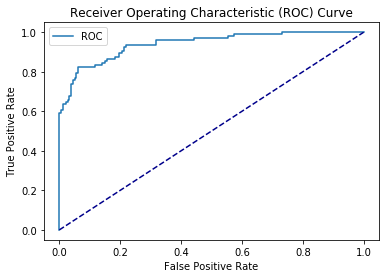

AUC: 0.94


In [167]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)


In [168]:
# Logistic

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[1000] }


hyperp_search(classifier,parameters)


f1_train: 0.891899 using {'C': 10, 'max_iter': 1000}
f1_test:  0.9222222222222222
[[178   1]
 [ 13  83]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       179
           1       0.99      0.86      0.92        96

    accuracy                           0.95       275
   macro avg       0.96      0.93      0.94       275
weighted avg       0.95      0.95      0.95       275



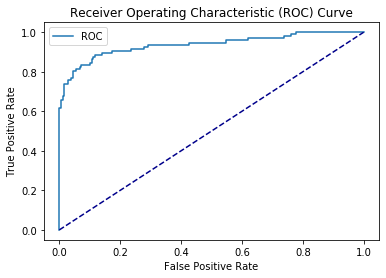

AUC: 0.94


In [169]:
model = LogisticRegression(C=1, max_iter=1000)

fpr4,tpr4=roc(model,X_train,y_train,X_test,y_test)


In [170]:
#SVM

from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.1,100]}

hyperp_search(classifier,parameters)

f1_train: 1.000000 using {'C': 100, 'kernel': 'linear'}
f1_test:  0.9894736842105264
[[179   0]
 [  2  94]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       179
           1       1.00      0.98      0.99        96

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



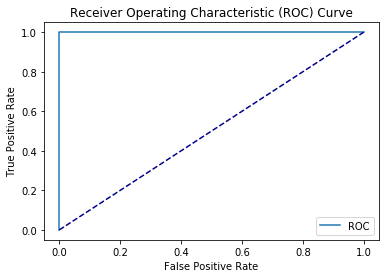

AUC: 1.00


In [171]:
model = SVC(C=100, kernel='linear',probability=True)

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)


In [172]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,20,5)],  "max_iter": [2000], "alpha": [0.001,0.1]}

hyperp_search(classifier,parameters)

f1_train: 0.627386 using {'alpha': 0.1, 'hidden_layer_sizes': (100, 20, 5), 'max_iter': 2000}
f1_test:  0.5844155844155844
[[166  13]
 [ 51  45]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       179
           1       0.78      0.47      0.58        96

    accuracy                           0.77       275
   macro avg       0.77      0.70      0.71       275
weighted avg       0.77      0.77      0.75       275



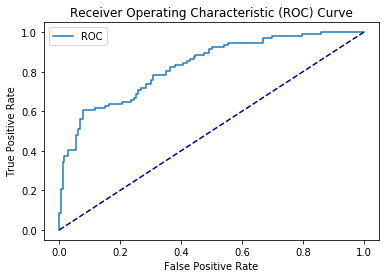

AUC: 0.83


In [173]:
model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.1, max_iter=2000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)


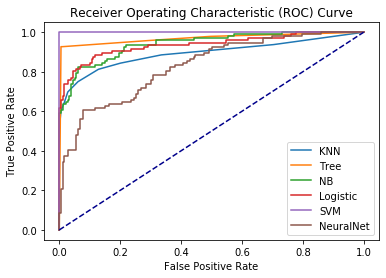

In [174]:
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
